In [2]:
import matplotlib as plt
import pandas as pd
from openbb import obb
from pandas.plotting import bootstrap_plot, scatter_matrix
obb.user.preferences.output_type = "dataframe"

In [4]:
df = obb.equity.price.historical("AAPL", provider="yfinance")

<Axes: xlabel='date'>

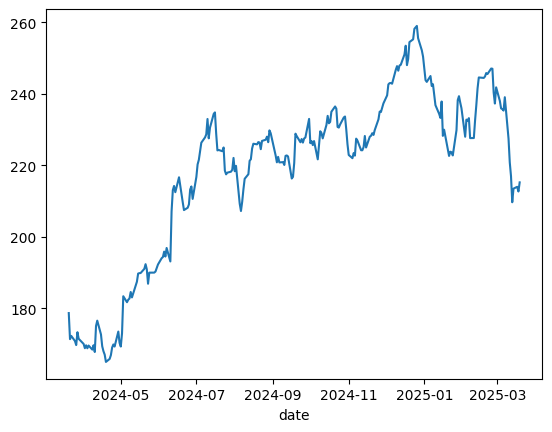

In [8]:
# A plot of the closing price
df.close.plot()

<Axes: title={'center': 'AAPL returns'}, xlabel='date'>

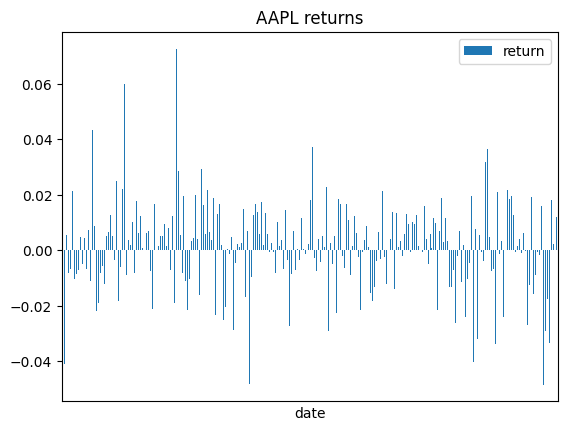

In [10]:
# A plot of the daily returns as a bar chart
returns = df.close.pct_change() 
returns.name = "return"
returns.plot.bar(
    title="AAPL returns",
    grid=False,
    legend=True,
    xticks=[]
)

<Axes: ylabel='Frequency'>

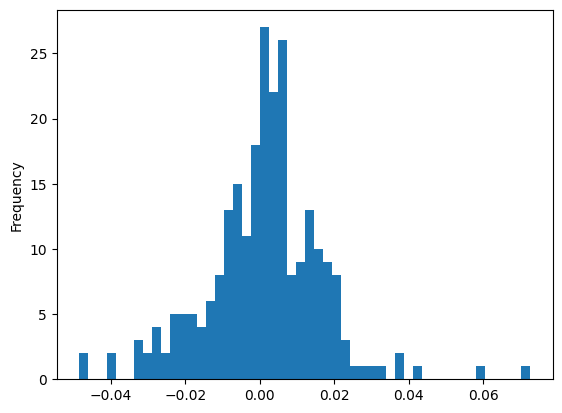

In [14]:
# Histogram of returns with 50 bins
returns.plot.hist(bins=50)

<Axes: >

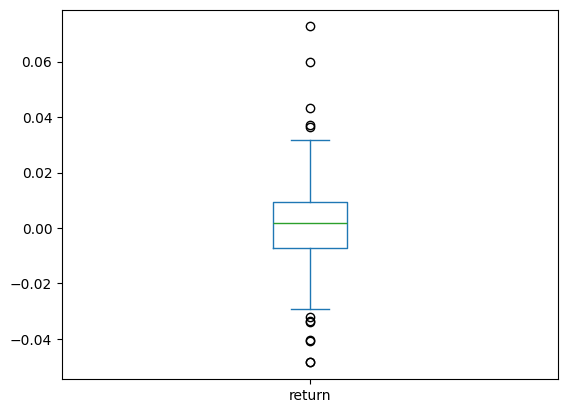

In [18]:
# A box-and-whisker plot
# Shows the median, quartiles, and outliers of AAPL daily returns
returns.plot.box()

<Axes: xlabel='QQQ', ylabel='AAPL'>

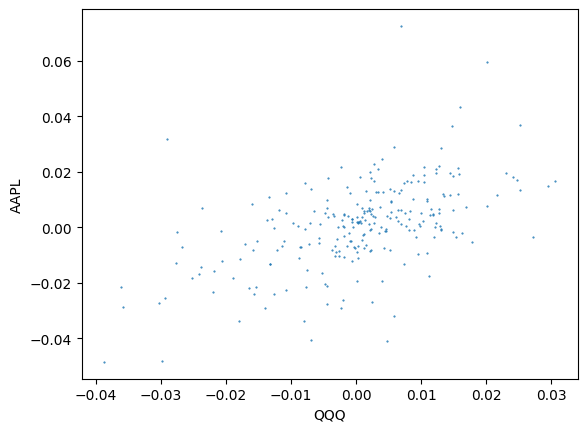

In [22]:
# Comparing AAPL with QQQ with a scatter plot
qqq = obb.equity.price.historical("QQQ", provider="yfinance")
qqq_returns = qqq.close.pct_change()
asset_bench = pd.concat([returns, qqq_returns], axis=1)
asset_bench.columns = ["AAPL", "QQQ"]
asset_bench.plot.scatter(x="QQQ", y="AAPL", s=0.25)

array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='QQQ', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='QQQ'>,
        <Axes: xlabel='QQQ', ylabel='QQQ'>]], dtype=object)

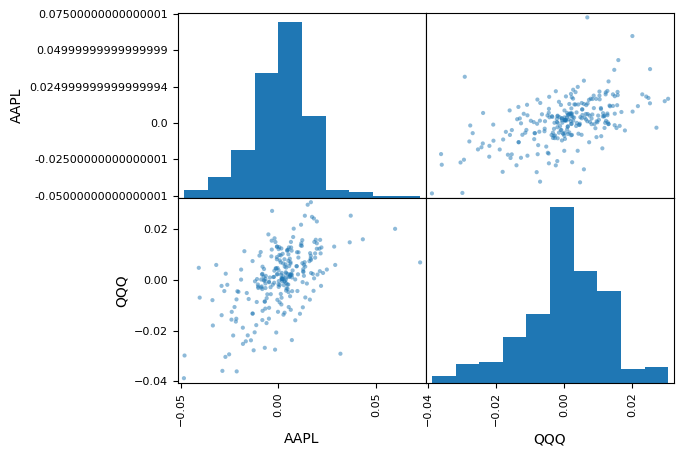

In [26]:
# Visualize the relationship between the 2 stocks pairwise
scatter_matrix(asset_bench)

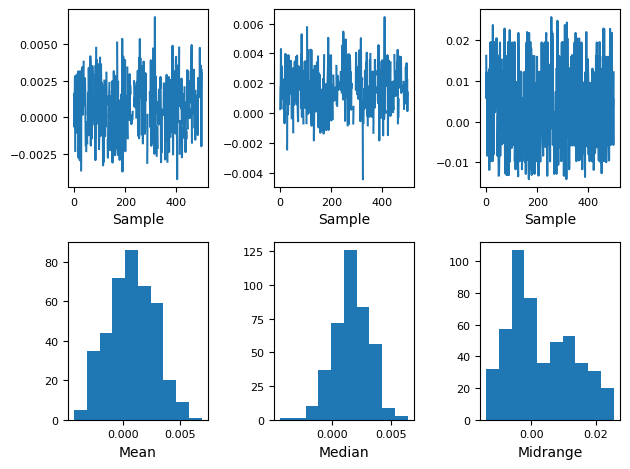

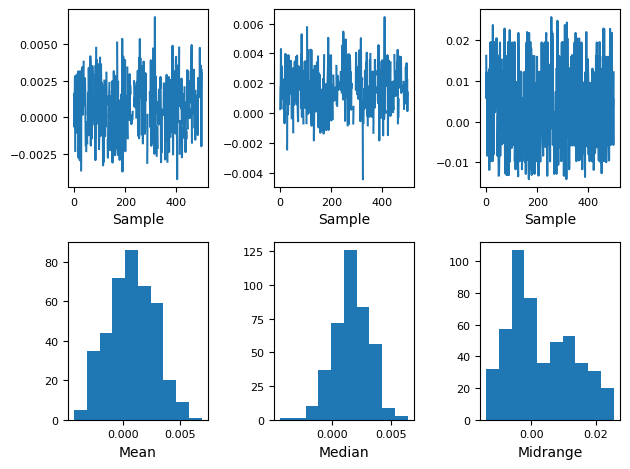

In [28]:
# Use bootstrap plots to see the possible patterns associated with a particular statistic in this case returns
bootstrap_plot(returns)